In [201]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import glob
from keras import models
import os
import seaborn as sns
from keras.utils import to_categorical
from PIL import Image

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.models import model_from_json 


%matplotlib inline


En primer lugar se hace una rutina para que se lean las imagenes dentro de una variable **training_data** que contenga las imágenes con su respectiva etiqueta

In [171]:
img_size = 64
datadir = "imagenes/"
categories = ["Perro100","Gato100"]
training_data=[]
labels = []
for category in categories:
    path =os.path.join(datadir,category)
    class_num = categories.index(category)
    for i in os.listdir(path)[1:-1]:
        if type(None) != type(cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE)):
            print(os.path.join(path,i)) 
            img_array = cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE)
            new_array =cv2.resize(img_array,(img_size,img_size))
            training_data.append(new_array)
            labels.append(class_num)
        else:
            print("imagen"+i+" no valida")

imagenes/Perro100/0.jpg
imagenes/Perro100/1.jpg
imagenes/Perro100/10.jpg
imagenes/Perro100/100.jpg
imagenes/Perro100/1000.jpg
imagenes/Perro100/10000.jpg
imagenes/Perro100/10001.jpg
imagenes/Perro100/10002.jpg
imagenes/Perro100/10003.jpg
imagenes/Perro100/10004.jpg
imagenes/Perro100/10005.jpg
imagenes/Perro100/10006.jpg
imagenes/Perro100/10007.jpg
imagenes/Perro100/10008.jpg
imagenes/Perro100/10009.jpg
imagenes/Perro100/1001.jpg
imagenes/Perro100/10010.jpg
imagenes/Perro100/10011.jpg
imagenes/Perro100/10012.jpg
imagenes/Perro100/10013.jpg
imagenes/Perro100/10014.jpg
imagenes/Perro100/10015.jpg
imagenes/Perro100/10016.jpg
imagenes/Perro100/10017.jpg
imagenes/Perro100/10018.jpg
imagenes/Perro100/10019.jpg
imagenes/Perro100/1002.jpg
imagenes/Perro100/10020.jpg
imagenes/Perro100/10021.jpg
imagenes/Perro100/10022.jpg
imagenes/Perro100/10023.jpg
imagenes/Perro100/10024.jpg
imagenes/Perro100/10025.jpg
imagenes/Perro100/10026.jpg
imagenes/Perro100/10027.jpg
imagenes/Perro100/10028.jpg
imagenes

In [172]:
np.shape(training_data)

(24925, 64, 64)

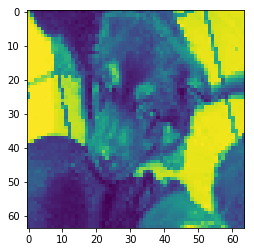

In [173]:
x = np.arange(len(training_data))
ind = (x[np.random.choice(x,size=int(0.8*len(training_data)),replace=False)])
ind_rev = np.delete(x,ind)

X_train=[];Y_train =[]
X_test = []; Y_test = []
for i in ind:
    X_train.append(training_data[i])
    Y_train.append(labels[i])
for i in ind_rev:
    X_test.append(training_data[i])
    Y_test.append(labels[i])
    
ima= np.random.randint(len(X_test))
plt.imshow(training_data[ima])

Se define entonces los datos de entrenamiento y los datos test

In [7]:
#[X_train,Y_train] = training_data[:int(0.8*len(training_data))],labels[:int(0.8*len(labels))]
#[X_test,Y_test] = training_data[int(0.8*len(training_data)):len(training_data)],labels[int(0.8*len(labels)):len(labels)]

hay 19940 datos de entrenamiento y 4985 datos de testeo
Este es el numero de ocurrencia de cada animal


(19940, 64, 64, 1)

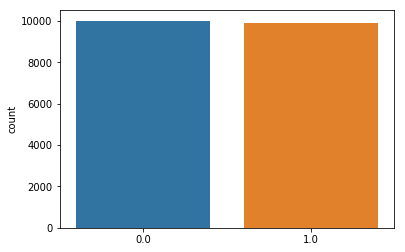

In [174]:
X_train = np.array(X_train).reshape(len(X_train),img_size,img_size,1)/np.max(X_train)
Y_train = np.array(Y_train)/np.max(Y_train)
X_test = np.array(X_test).reshape(len(X_test),img_size,img_size,1)/np.max(X_test)
Y_test = np.array(Y_test)/np.max(Y_test)

print("hay", X_train.shape[0],"datos de entrenamiento y",X_test.shape[0],"datos de testeo")
print("Este es el numero de ocurrencia de cada animal")
sns.countplot(Y_train)

np.shape(X_train)



Veamos las primeras 64 imagenes que vamos a utilizar

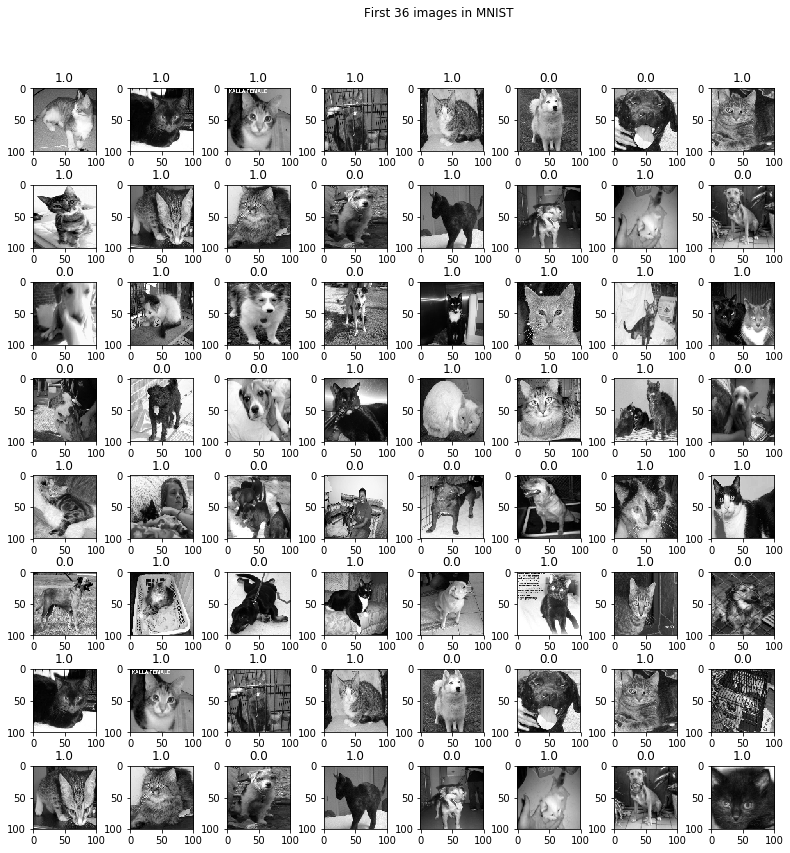

In [69]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(8) for j in range(8)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((img_size, img_size)), cmap = 'gray')
    ax[x, y].set_title(Y_train[x + y * 6])

In [175]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [176]:
print(Y_train)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [213]:
np.shape(Y_train)

(19940, 2)

In [215]:
size = (img_size,img_size,1)
n_classes = 2

model = Sequential()

model.add(Conv2D(32,(3,3),padding = "same",input_shape = size,kernel_initializer = "normal"))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3),padding = "same",activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),padding = "same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3),padding = "same",activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3),padding = "same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(Conv2D(128,(3,3),padding = "same",activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#model.add(Conv2D(256,(3,3),padding = "same"))
#model.add(BatchNormalization(axis=-1))
#model.add(Activation("relu"))
#model.add(Conv2D(256,(3,3),padding = "same",activation="relu"))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(n_classes))
model.add(BatchNormalization(axis=-1))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization_66 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
activation_132 (Activation)  (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_67 (Batc (None, 32, 32, 64)        256       
__________

In [216]:
history = model.fit(X_train, Y_train, batch_size = 60, epochs = 4, 
        validation_split = 0.2, verbose = 1)

Train on 15952 samples, validate on 3988 samples
Epoch 1/4
15952/15952 [==============================] - 1245s 78ms/step - loss: 0.5455 - acc: 0.7177 - val_loss: 0.7269 - val_acc: 0.6201
Epoch 2/4
15952/15952 [==============================] - 26919s 2s/step - loss: 0.3862 - acc: 0.8277 - val_loss: 0.4501 - val_acc: 0.7889
Epoch 3/4
15952/15952 [==============================] - 1053s 66ms/step - loss: 0.3034 - acc: 0.8731 - val_loss: 0.6961 - val_acc: 0.6705
Epoch 4/4
15952/15952 [==============================] - 1113s 70ms/step - loss: 0.2389 - acc: 0.9102 - val_loss: 0.4775 - val_acc: 0.7801


In [217]:
score, acc = model.evaluate(X_test, Y_test, verbose = 1)
print(score)
print(acc)

4985/4985 [==============================] - 112s 23ms/step
0.4619106928228495
0.7859578734893378


In [218]:
Y_pred = model.predict(X_test)
Y_pred


array([[0.9144908 , 0.08550919],
       [0.78508717, 0.21491277],
       [0.864198  , 0.13580191],
       ...,
       [0.64217436, 0.35782564],
       [0.00933032, 0.9906696 ],
       [0.11576928, 0.8842307 ]], dtype=float32)

Es gato
[0.11923844 0.8807615 ]


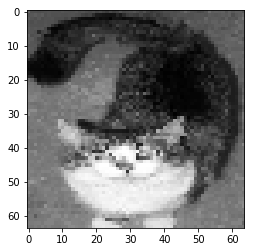

Es gato
[0.08406586 0.9159341 ]


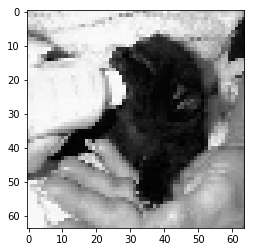

Es perro
[0.59721875 0.40278125]


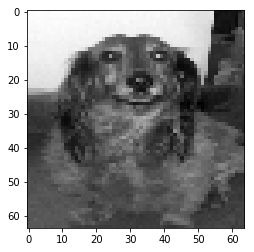

Es perro
[0.78563637 0.21436362]


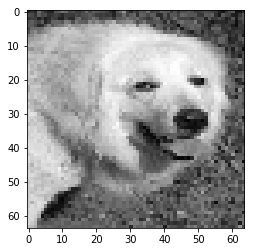

Es perro
[0.5609753  0.43902475]


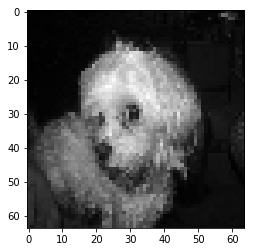

Es gato
[0.00878738 0.99121267]


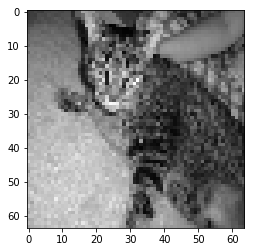

Es gato
[0.17973387 0.8202661 ]


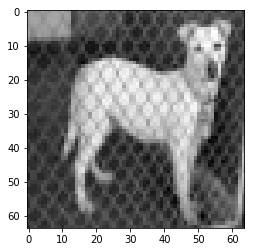

Es gato
[0.28491217 0.71508783]


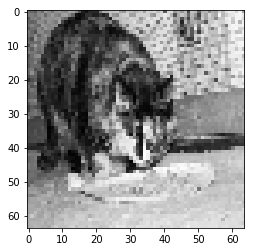

Es gato
[0.25562078 0.7443793 ]


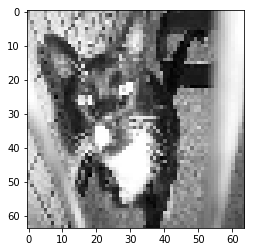

Es gato
[0.3218651 0.6781349]


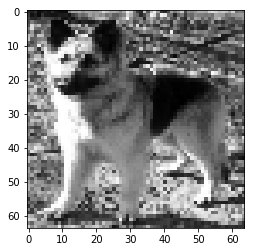

Es gato
[0.22033921 0.77966076]


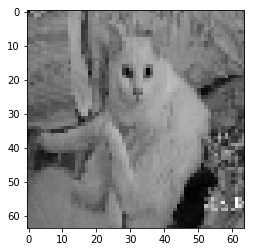

In [231]:
for i in range(11):
    ima= np.random.randint(len(X_test))
    if np.argmax(Y_pred[ima]) == 1:
        print("Es gato")
    else:
        print("Es perro")
    print (Y_pred[ima])
    plt.imshow(X_test[ima].reshape(img_size,img_size),cmap = "gray")
    plt.show()


    

In [199]:
Y_pred = model.predict(X_test)
Y_pred_real = []
Y_test_real = []
Y_prob = []
for i in range(len(Y_pred)):
    Y_pred_real.append(np.argmax(Y_pred[i], axis=None, out=None))
    Y_test_real.append(np.argmax(Y_test[i], axis=None, out=None))
    Y_prob.append(np.max(Y_pred[i]))


Se guarda el modelo dentro en JSON

In [220]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Modelo guardado en el disco")

Modelo guardado en el disco


Cargar el modelo 

In [221]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 

Loaded model from disk


In [222]:
Y_pred = model.predict(X_test)
Y_pred_real = []
Y_test_real = []
Y_prob = []
for i in range(len(Y_pred)):
    Y_pred_real.append(np.argmax(Y_pred[i], axis=None, out=None))
    Y_test_real.append(np.argmax(Y_test[i], axis=None, out=None))
    Y_prob.append(np.max(Y_pred[i]))

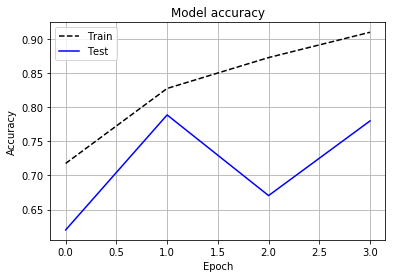

In [227]:
plt.plot(history.history['acc'],"k--")
plt.plot(history.history['val_acc'],"b-")
plt.title('Model accuracy')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

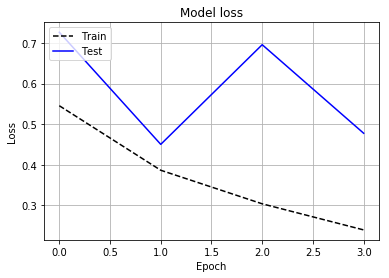

In [228]:
plt.plot(history.history['loss'],"k--")
plt.plot(history.history['val_loss'],"b-")
plt.title('Model loss')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()